<a href="https://colab.research.google.com/github/Saiht01/Bootcamp/blob/brayan/Clase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparación del Gasto en Salud y Desempleo en Colombia frente a Países de América Latina

Datos a tratar:
- Gasto en Salud (% del PIB): Nivel de gasto actual en salud expresado como porcentaje del PIB. Las estimaciones del gasto actual en salud incluyen los bienes y servicios de salud consumidos cada año.

- Desempleo (% de la fuerza laboral total): El desempleo se refiere al porcentaje de la fuerza laboral que
no tiene trabajo pero está disponible y busca empleo.


In [ ]:
import pandas as pd
import numpy as np

country = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/life expectancy.csv')
country

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [ ]:
list(country.columns)

['Country Name',
 'Country Code',
 'Region',
 'IncomeGroup',
 'Year',
 'Life Expectancy World Bank',
 'Prevelance of Undernourishment',
 'CO2',
 'Health Expenditure %',
 'Education Expenditure %',
 'Unemployment',
 'Corruption',
 'Sanitation',
 'Injuries',
 'Communicable',
 'NonCommunicable']

In [ ]:
latam = country[country['Region'] == 'Latin America & Caribbean'].copy()

cols_keep = [
    'Country Name',
    'Year',
    'Health Expenditure %',
    'Unemployment',
    'Life Expectancy World Bank'
]
latam = latam[cols_keep]

latam.rename(columns={
    'Health Expenditure %': 'Gastos de Salud (%)',
    'Unemployment': 'Desempleo (%)',
    'Life Expectancy World Bank': 'Expectativa de Vida'
}, inplace=True)


latam.head(10)

,Country Name,Year,Gastos de Salud (%),Desempleo (%),Expectativa de Vida
5,Argentina,2001,8.371798,17.320,73.755
8,Antigua and Barbuda,2001,5.435876,NaN,74.171
21,Belize,2001,4.632415,9.070,69.040
23,Bolivia,2001,4.825222,2.485,63.054
24,Brazil,2001,8.549606,9.610,70.462
25,Barbados,2001,5.525292,9.850,77.362
31,Chile,2001,7.151041,10.390,76.634
35,Colombia,2001,5.942382,15.040,73.241
37,Costa Rica,2001,6.474104,5.920,77.601
38,Cuba,2001,6.982098,4.080,76.905


### **1. ¿Colombia gasta más o menos en salud (como % del PIB) que el promedio de América Latina y el Caribe?**

In [ ]:
#  Promedio regional por año
regional_mean = (
    latam
    .groupby('Year', as_index=False)['Gastos de Salud (%)']
    .mean()
    .rename(columns={'Gastos de Salud (%)': 'Promedio LAC'})
)



regional_mean.head()

,Year,Promedio LAC
0,2001,5.748552
1,2002,5.859975
2,2003,5.846952
3,2004,5.835123
4,2005,5.870665


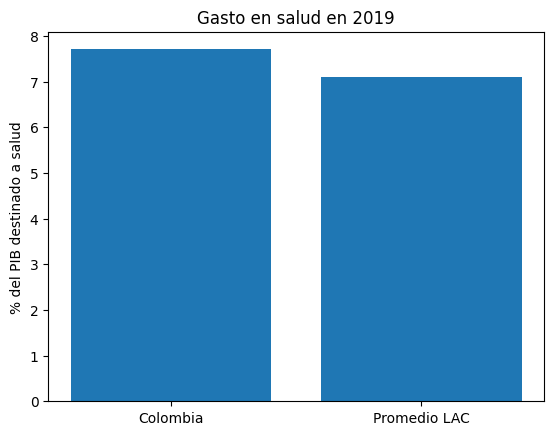

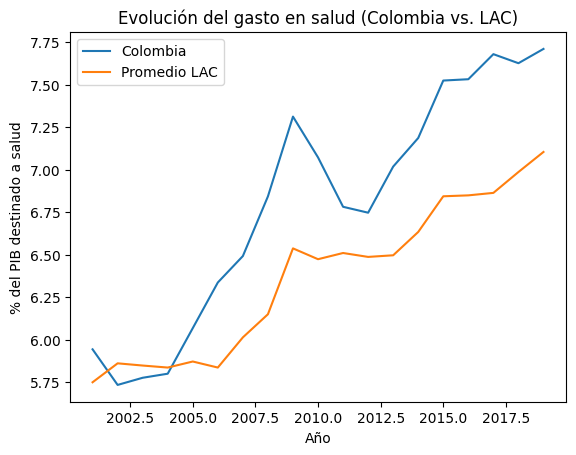

En 2019, Colombia gasta más en salud (como % del PIB) que el promedio de América Latina y el Caribe (7.71% vs. 7.10%).


In [ ]:
import matplotlib.pyplot as plt

# Serie de Colombia
colombia = (
    latam[latam['Country Name'] == 'Colombia'][['Year', 'Gastos de Salud (%)']]
    .rename(columns={'Gastos de Salud (%)': 'Colombia'})
)


df_compare = pd.merge(colombia, regional_mean, on='Year', how='inner')


latest_year = df_compare['Year'].max()
col_last = df_compare.loc[df_compare['Year'] == latest_year, 'Colombia'].iloc[0]
reg_last = df_compare.loc[df_compare['Year'] == latest_year, 'Promedio LAC'].iloc[0]

#  Gráfico de barras
plt.figure()
plt.bar(['Colombia', 'Promedio LAC'], [col_last, reg_last])
plt.ylabel('% del PIB destinado a salud')
plt.title(f'Gasto en salud en {latest_year}')
plt.show()

# Serie temporal
plt.figure()
plt.plot(df_compare['Year'], df_compare['Colombia'], label='Colombia')
plt.plot(df_compare['Year'], df_compare['Promedio LAC'], label='Promedio LAC')
plt.ylabel('% del PIB destinado a salud')
plt.xlabel('Año')
plt.title('Evolución del gasto en salud (Colombia vs. LAC)')
plt.legend()
plt.show()


resultado = "más" if col_last > reg_last else "menos"
print(f"En {latest_year}, Colombia gasta {resultado} en salud "
      f"(como % del PIB) que el promedio de América Latina y el Caribe "
      f"({col_last:.2f}% vs. {reg_last:.2f}%).")

/tmp/ipython-input-17-3033800127.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


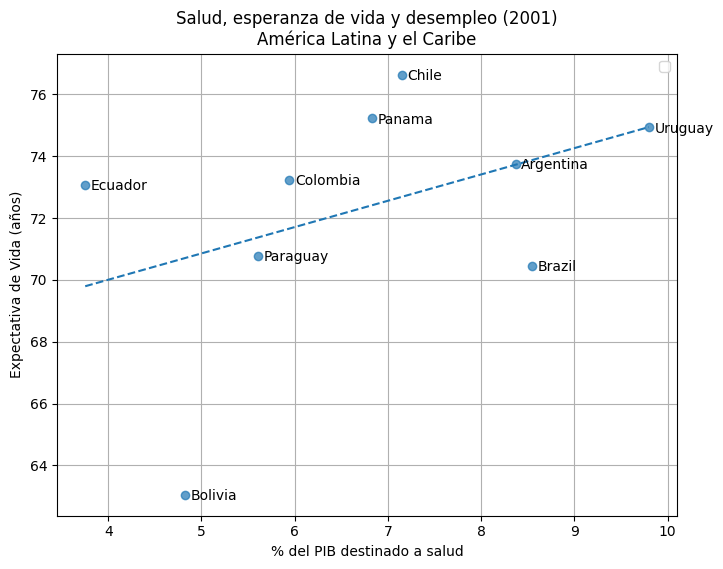

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress


paises_objetivo = [
    'Venezuela, RB',
    'Chile',
    'Argentina',
    'Brazil',
    'Ecuador',
    'Colombia',
    'Panama',
    'Bolivia',
    'Uruguay',
    'Paraguay'
]


mask = latam[latam['Country Name'].isin(paises_objetivo)]
cols_req = ['Gastos de Salud (%)', 'Expectativa de Vida', 'Desempleo (%)']
anio_ref = (
    mask.dropna(subset=cols_req)
        .groupby('Year')
        .size()
        .idxmax()
)

df_ref = mask[(mask['Year'] == anio_ref)].dropna(subset=cols_req)


#  Burbujas

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df_ref['Gastos de Salud (%)'],
    df_ref['Expectativa de Vida'],
    alpha=0.7
)

# Etiquetas
for _, fila in df_ref.iterrows():
    plt.annotate(
        fila['Country Name'],
        (fila['Gastos de Salud (%)'], fila['Expectativa de Vida']),
        xytext=(4, -4), textcoords='offset points'
    )

plt.xlabel('% del PIB destinado a salud')
plt.ylabel('Expectativa de Vida (años)')
plt.title(f'Salud, esperanza de vida y desempleo ({anio_ref})\nAmérica Latina y el Caribe')
plt.grid(True)


#  Línea de tendencia global

slope, intercept, r_val, *_ = linregress(
    df_ref['Gastos de Salud (%)'],
    df_ref['Expectativa de Vida']
)
xmin, xmax = df_ref['Gastos de Salud (%)'].agg(['min', 'max'])
plt.plot(
    [xmin, xmax],
    [intercept + slope * xmin, intercept + slope * xmax],
    linestyle='--',

)
plt.legend()
plt.show()



Países que invierten más en salud, como Uruguay, Argentina, Chile y Panamá, tienden a tener una mayor esperanza de vida (por encima de los 74 años).

Por el contrario, países con bajo gasto en salud, como Bolivia, Paraguay y Ecuador, se ubican en la parte inferior del gráfico, con esperanza de vida entre 63 y 73 años.

**Colombia** se sitúa cerca del promedio regional, con un gasto de salud alrededor del **6%** del PIB y una esperanza de vida de aproximadamente 73 años.

Esto indica que, aunque su gasto es moderado, logra resultados de esperanza de vida ligeramente superiores a lo que se esperaría por su nivel de inversión, comparado con países como Brasil.

## **2. ¿Cómo se compara la tasa de desempleo de Colombia con la de los países vecinos en Sudamérica en los últimos 5 años?**

/tmp/ipython-input-18-3964733359.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


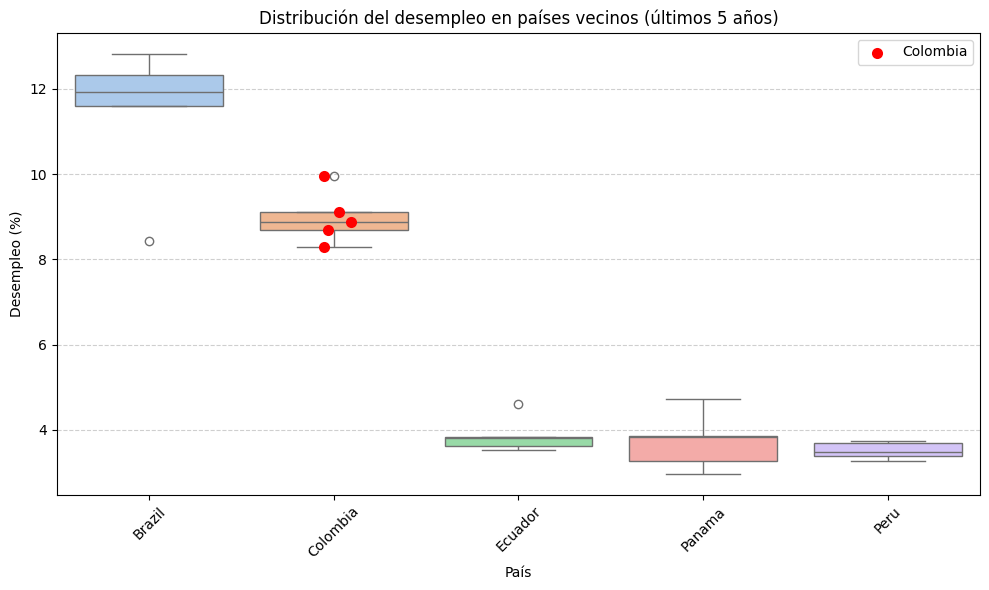

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


paises_vecinos = [
    'Brazil', 'Ecuador', 'Peru', 'Venezuela, RB',  'Panama'
]

paises_comparar = paises_vecinos + ['Colombia']


# Ultimos 5 años

ultimos_5 = latam['Year'].max() - 4
df_vecinos = latam[
    (latam['Country Name'].isin(paises_comparar)) &
    (latam['Year'] >= ultimos_5)
].dropna(subset=['Desempleo (%)'])


# Diagrama de caja y bigotes

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_vecinos,
    x='Country Name',
    y='Desempleo (%)',
    palette='pastel'
)


datos_col = df_vecinos[df_vecinos['Country Name'] == 'Colombia']
sns.stripplot(
    data=datos_col,
    x='Country Name',
    y='Desempleo (%)',
    color='red',
    size=8,
    label='Colombia'
)

plt.title('Distribución del desempleo en países vecinos (últimos 5 años)')
plt.ylabel('Desempleo (%)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Colombia presenta una tasa de desempleo consistentemente más alta que la mayoría de sus vecinos.

 - Sus valores (en rojo) están por encima del 9% en la mayoría de los años.

 - La mediana y el rango intercuartílico están por encima de Ecuador, Panamá y Perú.

Brasil es el único país con una tasa de desempleo superior, pero también muestra alta dispersión, lo que sugiere inestabilidad en el mercado laboral.

Países como Ecuador, Panamá y Perú tienen tasas de desempleo más bajas y estables, con valores entre el 3% y 5%.